In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from utils_2 import train_segmentation_network, load_warwick, find_best_and_worst_case, visualize_case

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


# Semantic segmentation of Biomedical images

In [44]:
batch_size = 16
X_train, Y_train, X_test, Y_test = load_warwick(device)

train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Hyperparameters
num_epochs = 500
learning_rate = 0.001   
criterion = nn.BCEWithLogitsLoss()

## Exercise 2.1. Semantic segmentation

Epoch 1/500, Train Loss: 0.7072, Test Loss: 0.6985, Train Dice Score: 0.0808, Test Dice Score: 0.0023
Epoch 2/500, Train Loss: 0.6965, Test Loss: 0.6917, Train Dice Score: 0.0516, Test Dice Score: 0.0155
Epoch 3/500, Train Loss: 0.6885, Test Loss: 0.6905, Train Dice Score: 0.0155, Test Dice Score: 0.0186
Epoch 4/500, Train Loss: 0.6825, Test Loss: 0.6877, Train Dice Score: 0.0512, Test Dice Score: 0.0245
Epoch 5/500, Train Loss: 0.6733, Test Loss: 0.6764, Train Dice Score: 0.0441, Test Dice Score: 0.0413
Epoch 6/500, Train Loss: 0.6555, Test Loss: 0.6732, Train Dice Score: 0.1599, Test Dice Score: 0.3613
Epoch 7/500, Train Loss: 0.6346, Test Loss: 0.6541, Train Dice Score: 0.4283, Test Dice Score: 0.3801
Epoch 8/500, Train Loss: 0.6180, Test Loss: 0.6510, Train Dice Score: 0.4719, Test Dice Score: 0.5005
Epoch 9/500, Train Loss: 0.6016, Test Loss: 0.6346, Train Dice Score: 0.5326, Test Dice Score: 0.4483
Epoch 10/500, Train Loss: 0.5969, Test Loss: 0.6281, Train Dice Score: 0.5148, Tes

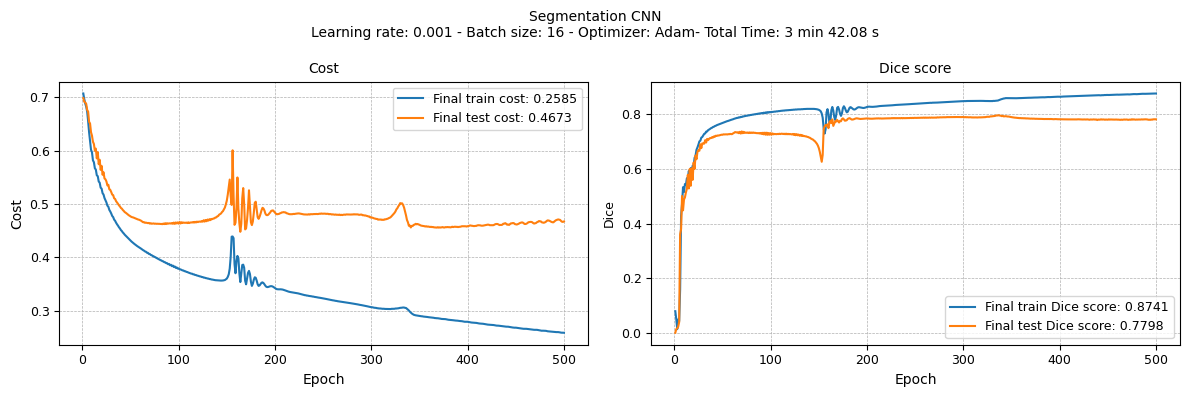

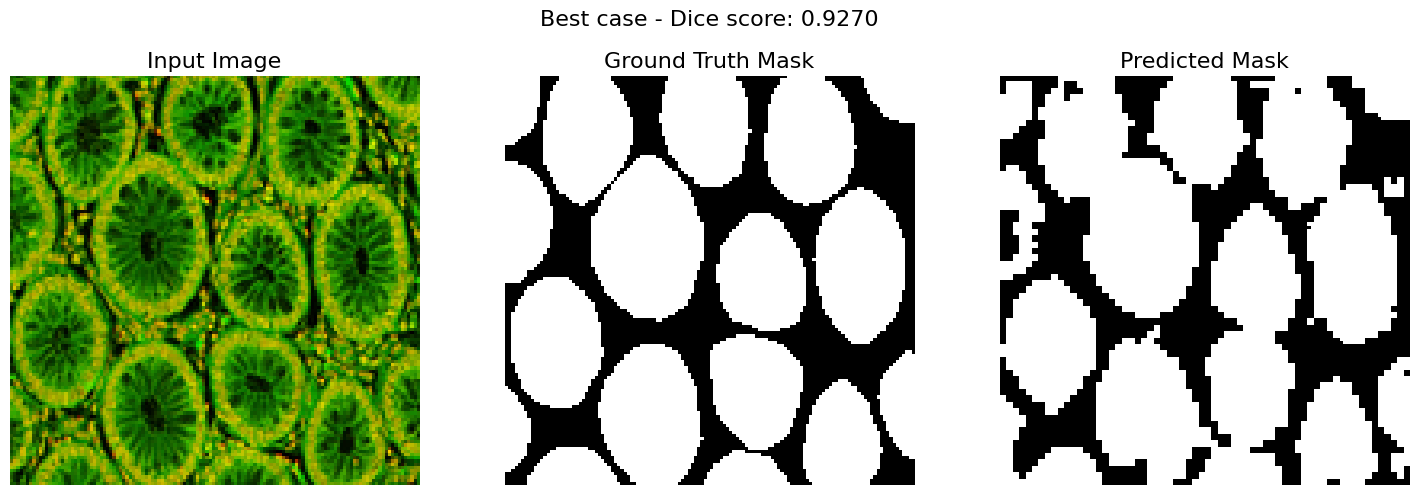

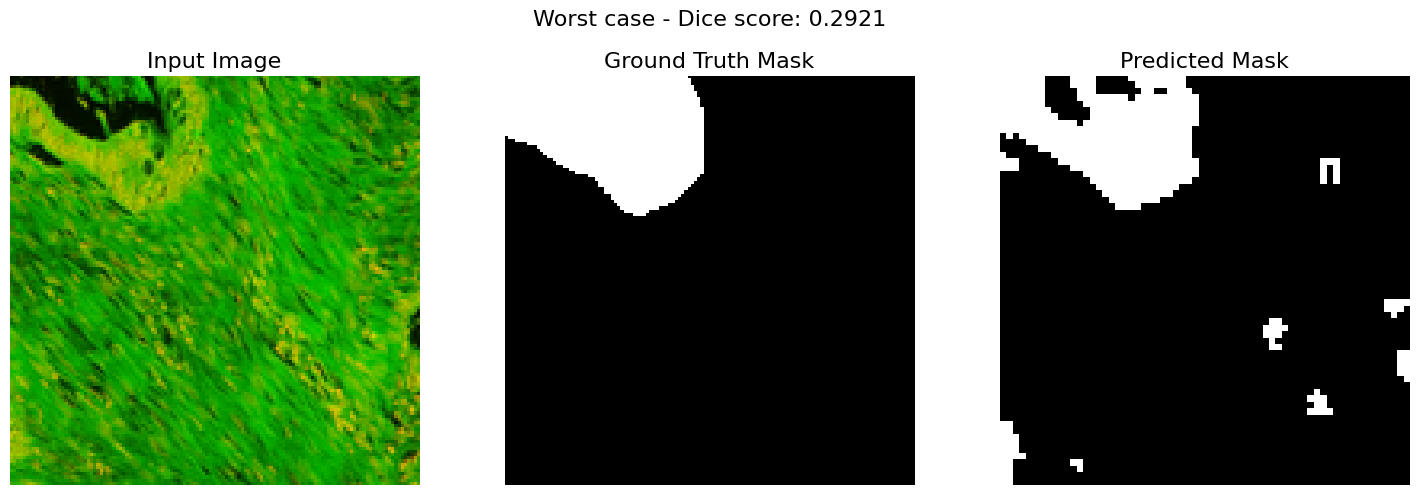

In [45]:
# Define the modified CNN architecture
class SegmentationCNN(nn.Module):
    def __init__(self):
        super(SegmentationCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, 1, 1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(8, 16, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(16, 32, 3, 1, 1)
        self.relu3 = nn.ReLU()

        self.up1 = nn.ConvTranspose2d(32, 16, 2, 2)
        self.relu4 = nn.ReLU()
        
        self.conv4 = nn.Conv2d(16, 1, 3, 1, 1)
        self.up2 = nn.ConvTranspose2d(1, 1, 2, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)

        x = self.up1(x)
        x = self.relu4(x)

        x = self.conv4(x)
        x = self.up2(x)
        return x.squeeze()

# Create an instance of the modified CNN
model = SegmentationCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_segmentation_network(model, criterion, optimizer, num_epochs=num_epochs,train_loader=train_loader, test_loader=test_loader,  device=device, model_name='Segmentation CNN')

best_case, worst_case = find_best_and_worst_case(model, X_test, Y_test, device)
visualize_case(best_case, device, name="Best case")
visualize_case(worst_case, device, name="Worst case")

## Exercise 2.2 Segmentation, three variations

### Variation 1 - Increase depth

- What did you change and why?

Added more convolutional layers to increase the depth of the network, which can capture more complex features.

- Do you think the network is overfitting or underfitting?

With increased depth, there's a higher risk of overfitting, especially if the dataset is not large enough.

Epoch 1/500, Train Loss: 0.7181, Test Loss: 0.7225, Train Dice Score: 0.3972, Test Dice Score: 0.1983
Epoch 2/500, Train Loss: 0.7172, Test Loss: 0.7208, Train Dice Score: 0.3843, Test Dice Score: 0.4757
Epoch 3/500, Train Loss: 0.7155, Test Loss: 0.7201, Train Dice Score: 0.4796, Test Dice Score: 0.4048
Epoch 4/500, Train Loss: 0.7134, Test Loss: 0.7186, Train Dice Score: 0.3880, Test Dice Score: 0.3187
Epoch 5/500, Train Loss: 0.7111, Test Loss: 0.7153, Train Dice Score: 0.2831, Test Dice Score: 0.3680
Epoch 6/500, Train Loss: 0.7056, Test Loss: 0.7134, Train Dice Score: 0.3935, Test Dice Score: 0.4375
Epoch 7/500, Train Loss: 0.7069, Test Loss: 0.7124, Train Dice Score: 0.4408, Test Dice Score: 0.3701
Epoch 8/500, Train Loss: 0.7028, Test Loss: 0.7067, Train Dice Score: 0.3762, Test Dice Score: 0.3726
Epoch 9/500, Train Loss: 0.6954, Test Loss: 0.7022, Train Dice Score: 0.4241, Test Dice Score: 0.4337
Epoch 10/500, Train Loss: 0.6925, Test Loss: 0.6980, Train Dice Score: 0.4478, Tes

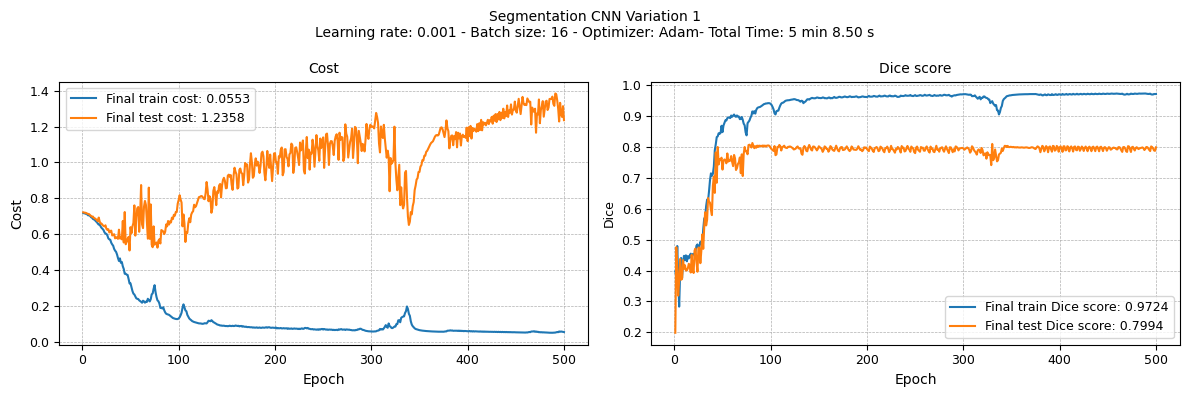

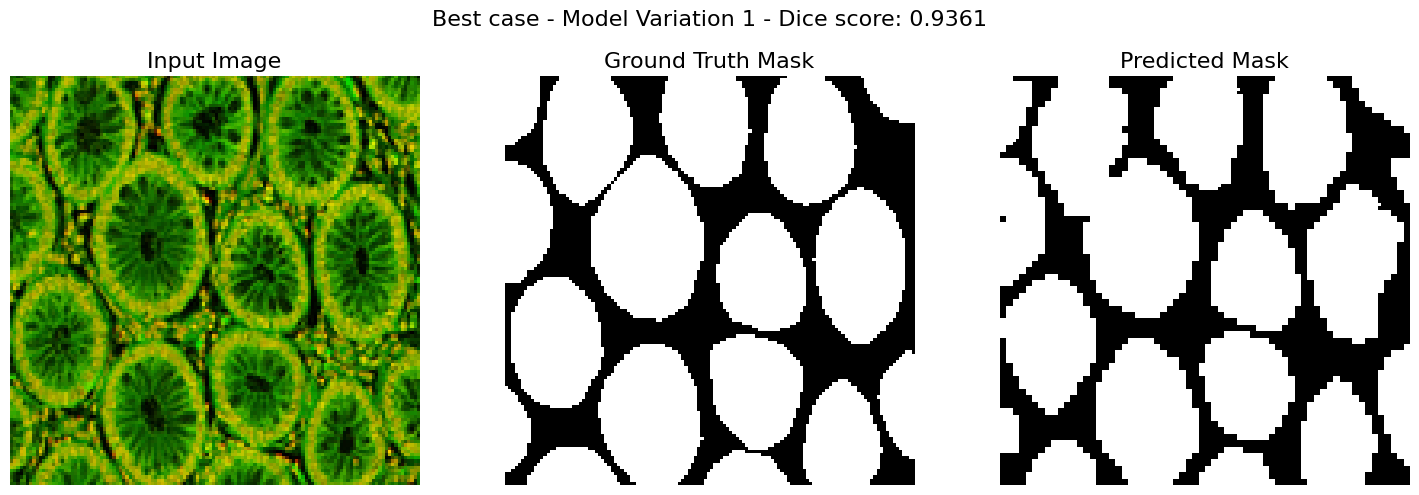

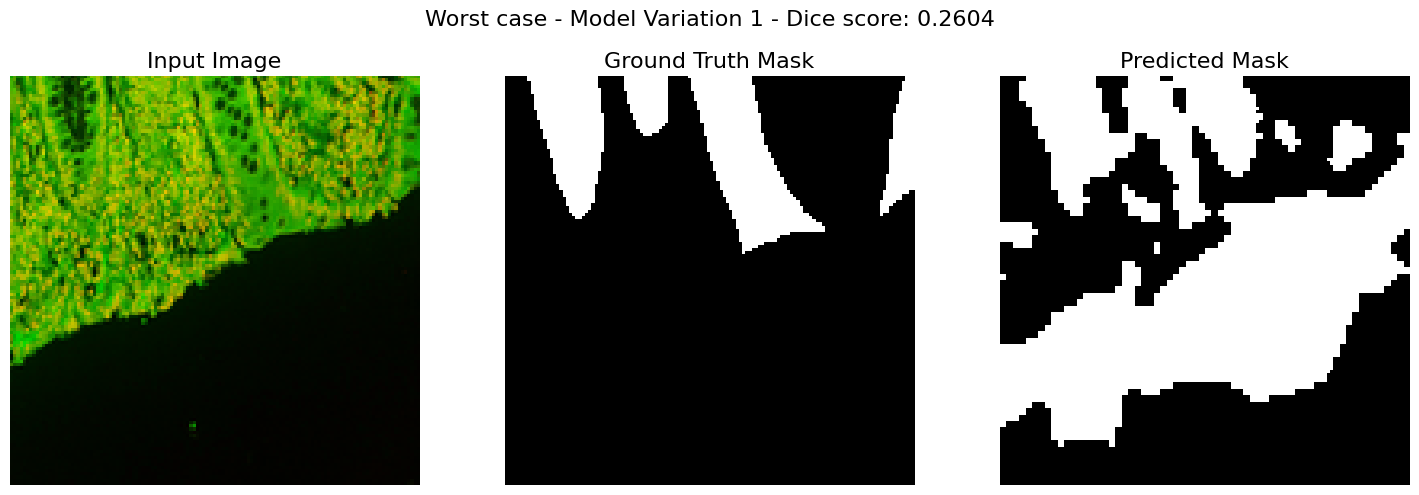

In [46]:
class SegmentationCNNVariation1(nn.Module):
    def __init__(self):
        super(SegmentationCNNVariation1, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, 1, 1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(8, 16, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(16, 32, 3, 1, 1)
        self.relu3 = nn.ReLU()

        # Additional convolutional layers
        self.conv4 = nn.Conv2d(32, 64, 3, 1, 1)
        self.relu4 = nn.ReLU()
        self.conv5 = nn.Conv2d(64, 64, 3, 1, 1)
        self.relu5 = nn.ReLU()

        self.up1 = nn.ConvTranspose2d(64, 32, 2, 2)
        self.relu6 = nn.ReLU()
        
        self.conv6 = nn.Conv2d(32, 16, 3, 1, 1)
        self.relu7 = nn.ReLU()
        
        self.conv7 = nn.Conv2d(16, 1, 3, 1, 1)
        self.up2 = nn.ConvTranspose2d(1, 1, 2, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.conv5(x)
        x = self.relu5(x)

        x = self.up1(x)
        x = self.relu6(x)

        x = self.conv6(x)
        x = self.relu7(x)

        x = self.conv7(x)
        x = self.up2(x)
        return x.squeeze()


model_variation1 = SegmentationCNNVariation1().to(device)
optimizer = torch.optim.Adam(model_variation1.parameters(), lr=learning_rate)
train_segmentation_network(model_variation1, criterion, optimizer, num_epochs=num_epochs,train_loader=train_loader, test_loader=test_loader,  device=device, model_name='Segmentation CNN Variation 1')

best_case_variation_1, worst_case_variation_1 = find_best_and_worst_case(model_variation1, X_test, Y_test, device)

visualize_case(best_case_variation_1, device, name="Best case - Model Variation 1")
visualize_case(worst_case_variation_1, device, name="Worst case - Model Variation 1")

### Variation 2 - Data Augmentation

What did you change and why?

- Added data augmentation to increase the diversity of training data and prevent overfitting.

Do you think the network is overfitting or underfitting?

- Augmentation should help reduce overfitting by providing more varied data.

Epoch 1/500, Train Loss: 0.7134, Test Loss: 0.7106, Train Dice Score: 0.1099, Test Dice Score: 0.0210
Epoch 2/500, Train Loss: 0.7040, Test Loss: 0.7099, Train Dice Score: 0.0113, Test Dice Score: 0.0073
Epoch 3/500, Train Loss: 0.7097, Test Loss: 0.7094, Train Dice Score: 0.0030, Test Dice Score: 0.0018
Epoch 4/500, Train Loss: 0.7089, Test Loss: 0.7087, Train Dice Score: 0.0027, Test Dice Score: 0.0067
Epoch 5/500, Train Loss: 0.7045, Test Loss: 0.7081, Train Dice Score: 0.0207, Test Dice Score: 0.0110
Epoch 6/500, Train Loss: 0.7031, Test Loss: 0.7073, Train Dice Score: 0.0269, Test Dice Score: 0.0483
Epoch 7/500, Train Loss: 0.7010, Test Loss: 0.7082, Train Dice Score: 0.0894, Test Dice Score: 0.1494
Epoch 8/500, Train Loss: 0.7037, Test Loss: 0.7054, Train Dice Score: 0.1380, Test Dice Score: 0.1362
Epoch 9/500, Train Loss: 0.6983, Test Loss: 0.7028, Train Dice Score: 0.1776, Test Dice Score: 0.1732
Epoch 10/500, Train Loss: 0.6977, Test Loss: 0.7007, Train Dice Score: 0.2174, Tes

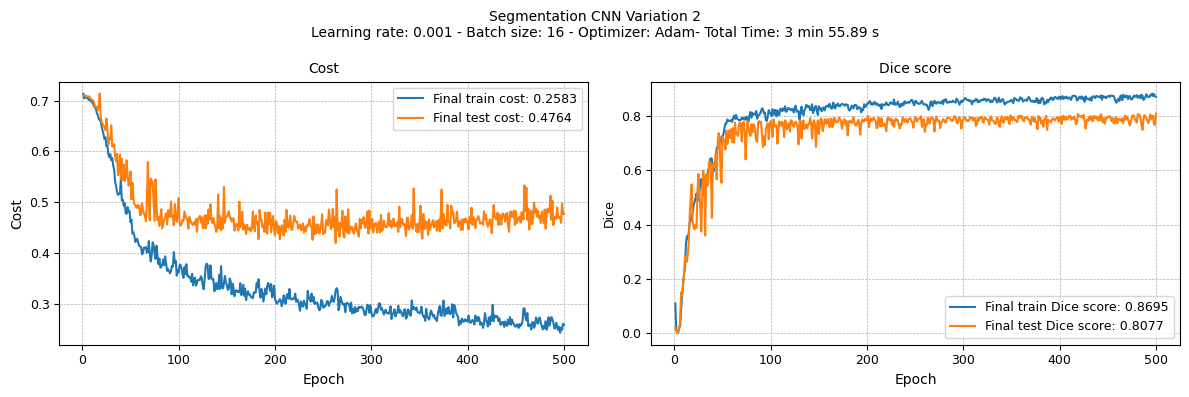

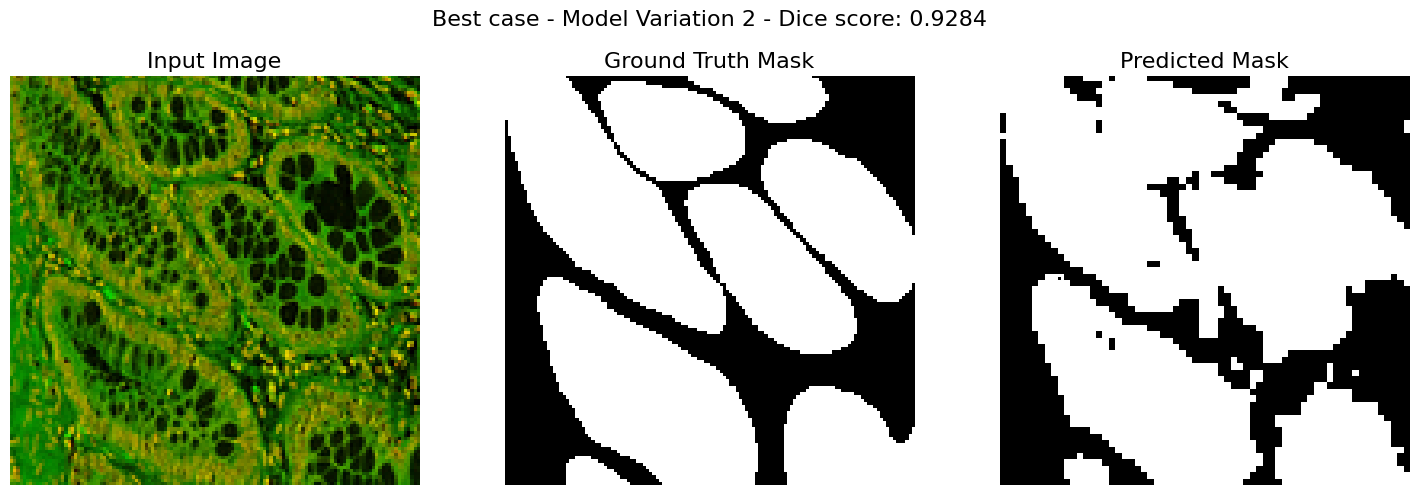

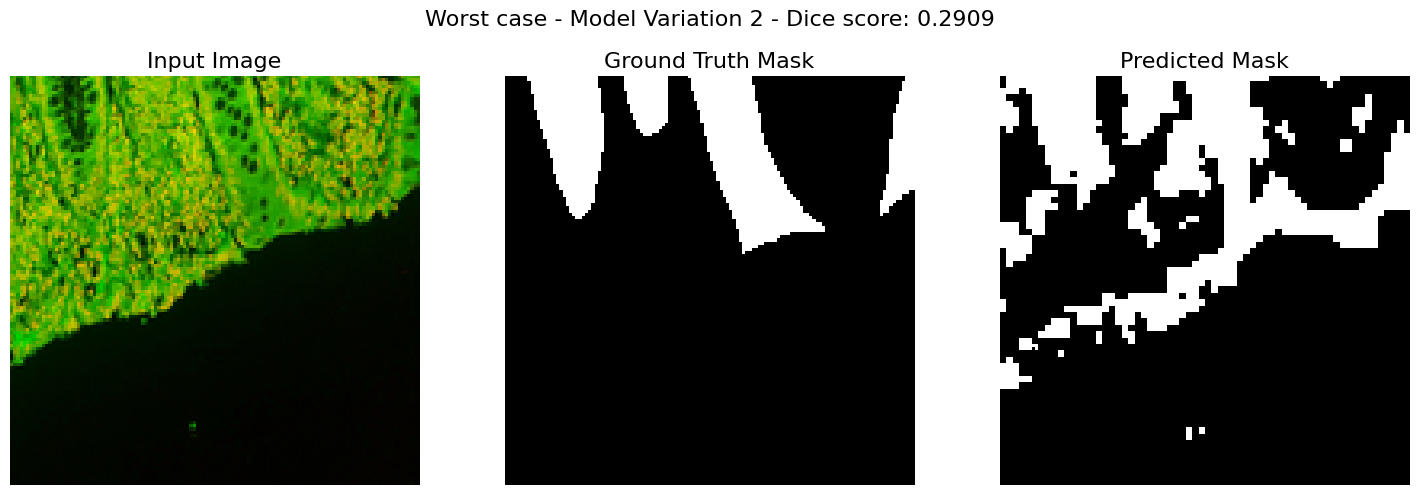

In [47]:
from torchvision import transforms
from torchvision.transforms import RandomHorizontalFlip, RandomVerticalFlip, RandomRotation

# Data augmentation
train_transform = transforms.Compose([
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    RandomRotation(degrees=10),
])

train_dataset_augmented = TensorDataset(X_train, Y_train)
train_dataset_augmented.transforms = train_transform

train_loader_augmented = DataLoader(train_dataset_augmented, batch_size=batch_size, shuffle=True)

# Define model
class SegmentationCNNVariation2(nn.Module):
    def __init__(self):
        super(SegmentationCNNVariation2, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, 1, 1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(8, 16, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(16, 32, 3, 1, 1)
        self.relu3 = nn.ReLU()

        self.up1 = nn.ConvTranspose2d(32, 16, 2, 2)
        self.relu4 = nn.ReLU()
        
        self.conv4 = nn.Conv2d(16, 1, 3, 1, 1)
        self.up2 = nn.ConvTranspose2d(1, 1, 2, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)

        x = self.up1(x)
        x = self.relu4(x)

        x = self.conv4(x)
        x = self.up2(x)
        return x.squeeze()


model_variation2 = SegmentationCNNVariation2().to(device)
optimizer = torch.optim.Adam(model_variation2.parameters(), lr=learning_rate)
train_segmentation_network(model_variation2, criterion, optimizer, num_epochs=num_epochs,train_loader=train_loader_augmented, test_loader=test_loader,  device=device, model_name='Segmentation CNN Variation 2')

best_case_variation_2, worst_case_variation_2 = find_best_and_worst_case(model_variation2, X_test, Y_test, device)

visualize_case(best_case_variation_2, device, name="Best case - Model Variation 2")
visualize_case(worst_case_variation_2, device, name="Worst case - Model Variation 2")

### Variation 3 - Dropout layer

What did you change and why?

- Added dropout layers for regularization, which can help prevent overfitting.

Do you think the network is overfitting or underfitting?

- Dropout layers can help prevent overfitting, so the network may be less likely to overfit.

Epoch 1/500, Train Loss: 0.7657, Test Loss: 0.7222, Train Dice Score: 0.1243, Test Dice Score: 0.0002
Epoch 2/500, Train Loss: 0.7237, Test Loss: 0.7170, Train Dice Score: 0.0171, Test Dice Score: 0.0000
Epoch 3/500, Train Loss: 0.7180, Test Loss: 0.7156, Train Dice Score: 0.0046, Test Dice Score: 0.0000
Epoch 4/500, Train Loss: 0.7152, Test Loss: 0.7134, Train Dice Score: 0.0001, Test Dice Score: 0.0000
Epoch 5/500, Train Loss: 0.7123, Test Loss: 0.7108, Train Dice Score: 0.0022, Test Dice Score: 0.0000
Epoch 6/500, Train Loss: 0.7098, Test Loss: 0.7087, Train Dice Score: 0.0072, Test Dice Score: 0.0000
Epoch 7/500, Train Loss: 0.7067, Test Loss: 0.7059, Train Dice Score: 0.0217, Test Dice Score: 0.0001
Epoch 8/500, Train Loss: 0.7028, Test Loss: 0.7034, Train Dice Score: 0.0417, Test Dice Score: 0.0032
Epoch 9/500, Train Loss: 0.6974, Test Loss: 0.7005, Train Dice Score: 0.1040, Test Dice Score: 0.0335
Epoch 10/500, Train Loss: 0.6924, Test Loss: 0.6982, Train Dice Score: 0.1549, Tes

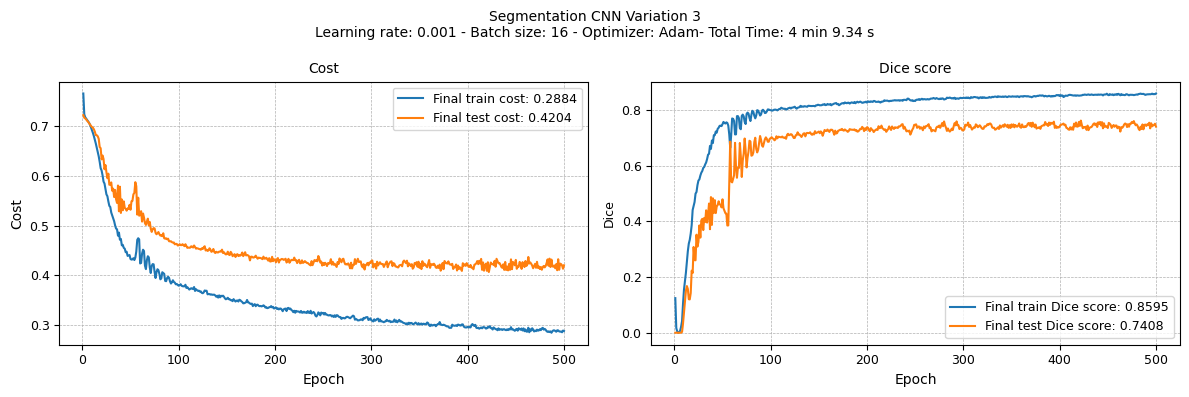

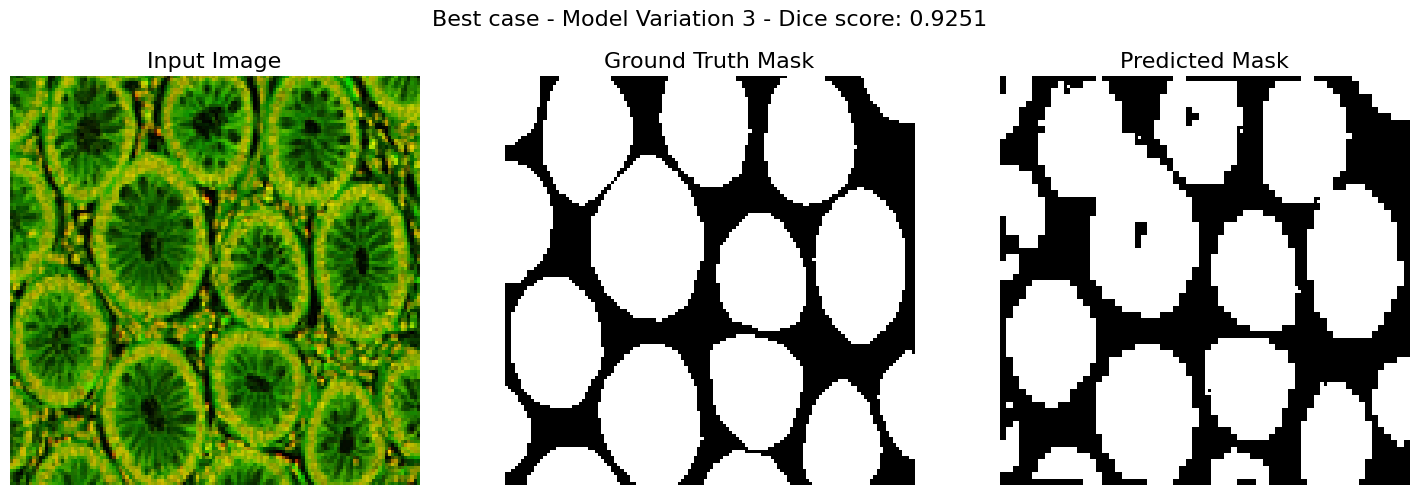

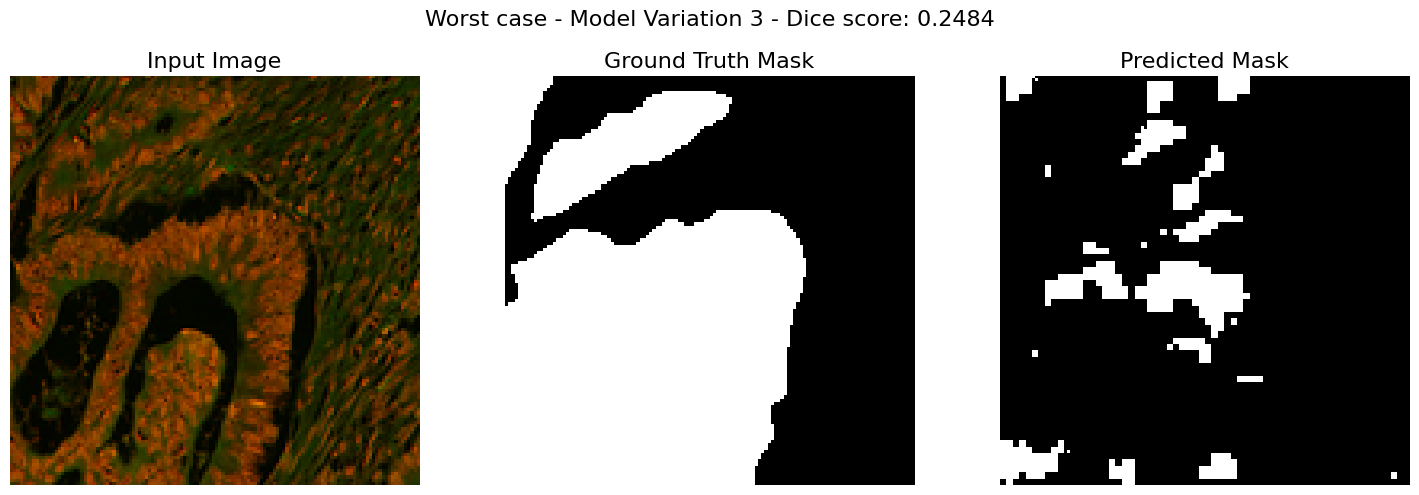

In [51]:
class SegmentationCNNVariation3(nn.Module):
    def __init__(self):
        super(SegmentationCNNVariation3, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, 1, 1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)  
        self.maxpool1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(8, 16, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)  
        self.maxpool2 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(16, 32, 3, 1, 1)
        self.dropout3 = nn.Dropout(p=0.2)  
        self.relu3 = nn.ReLU()

        self.up1 = nn.ConvTranspose2d(32, 16, 2, 2)
        self.relu4 = nn.ReLU()
        
        self.conv4 = nn.Conv2d(16, 1, 3, 1, 1)
        self.up2 = nn.ConvTranspose2d(1, 1, 2, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.up1(x)
        x = self.relu4(x)

        x = self.conv4(x)
        x = self.up2(x)
        return x.squeeze()

model_variation3 = SegmentationCNNVariation3().to(device)
optimizer = torch.optim.Adam(model_variation3.parameters(), lr=learning_rate)
train_segmentation_network(model_variation3, criterion, optimizer, num_epochs=num_epochs,train_loader=train_loader, test_loader=test_loader,  device=device, model_name='Segmentation CNN Variation 3')

best_case_variation_3, worst_case_variation_3 = find_best_and_worst_case(model_variation3, X_test, Y_test, device)

visualize_case(best_case_variation_3, device, name="Best case - Model Variation 3")
visualize_case(worst_case_variation_3, device, name="Worst case - Model Variation 3")


### Variation 4 - All three variations at once

Epoch 1/500, Train Loss: 0.7184, Test Loss: 0.7186, Train Dice Score: 0.0000, Test Dice Score: 0.0000
Epoch 2/500, Train Loss: 0.7160, Test Loss: 0.7167, Train Dice Score: 0.0000, Test Dice Score: 0.0000
Epoch 3/500, Train Loss: 0.7177, Test Loss: 0.7148, Train Dice Score: 0.0000, Test Dice Score: 0.0000
Epoch 4/500, Train Loss: 0.7092, Test Loss: 0.7140, Train Dice Score: 0.0001, Test Dice Score: 0.0000
Epoch 5/500, Train Loss: 0.7068, Test Loss: 0.7111, Train Dice Score: 0.0022, Test Dice Score: 0.0000
Epoch 6/500, Train Loss: 0.7088, Test Loss: 0.7094, Train Dice Score: 0.0010, Test Dice Score: 0.0000
Epoch 7/500, Train Loss: 0.7012, Test Loss: 0.7096, Train Dice Score: 0.0477, Test Dice Score: 0.0000
Epoch 8/500, Train Loss: 0.6929, Test Loss: 0.7021, Train Dice Score: 0.1120, Test Dice Score: 0.0086
Epoch 9/500, Train Loss: 0.6843, Test Loss: 0.7017, Train Dice Score: 0.2066, Test Dice Score: 0.0197
Epoch 10/500, Train Loss: 0.6722, Test Loss: 0.7037, Train Dice Score: 0.2625, Tes

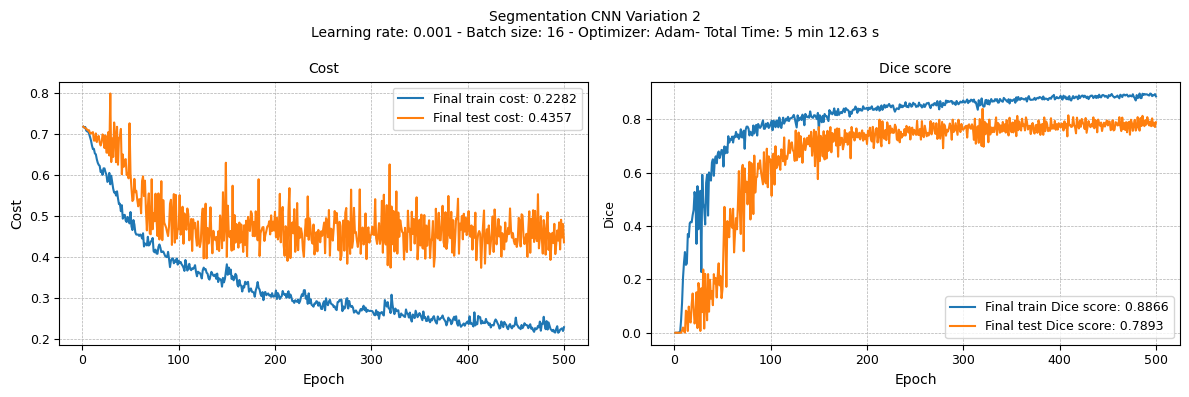

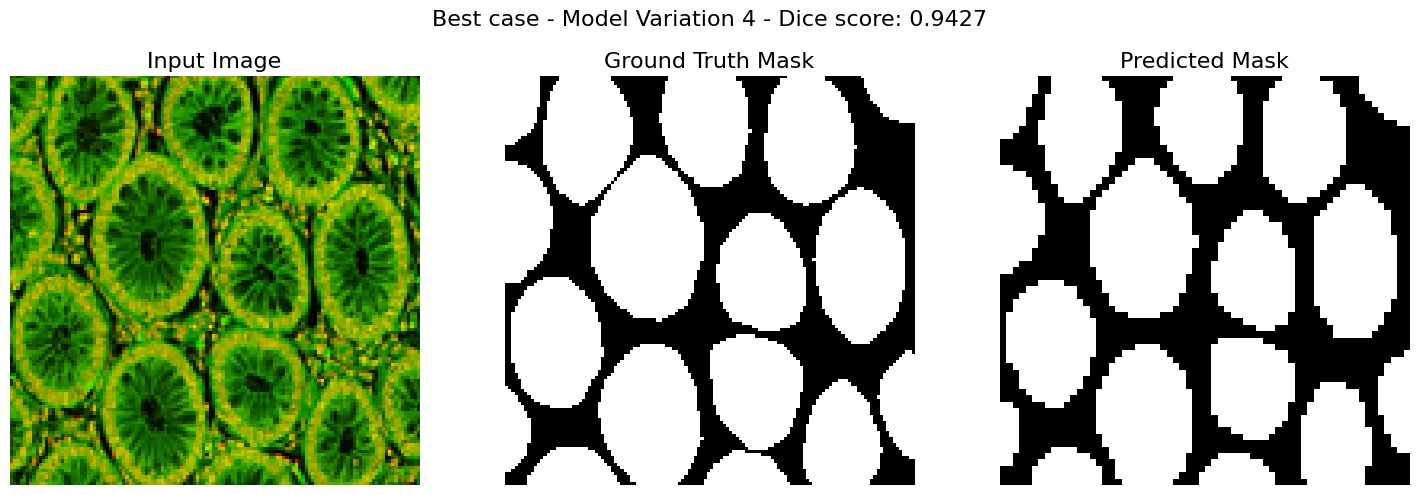

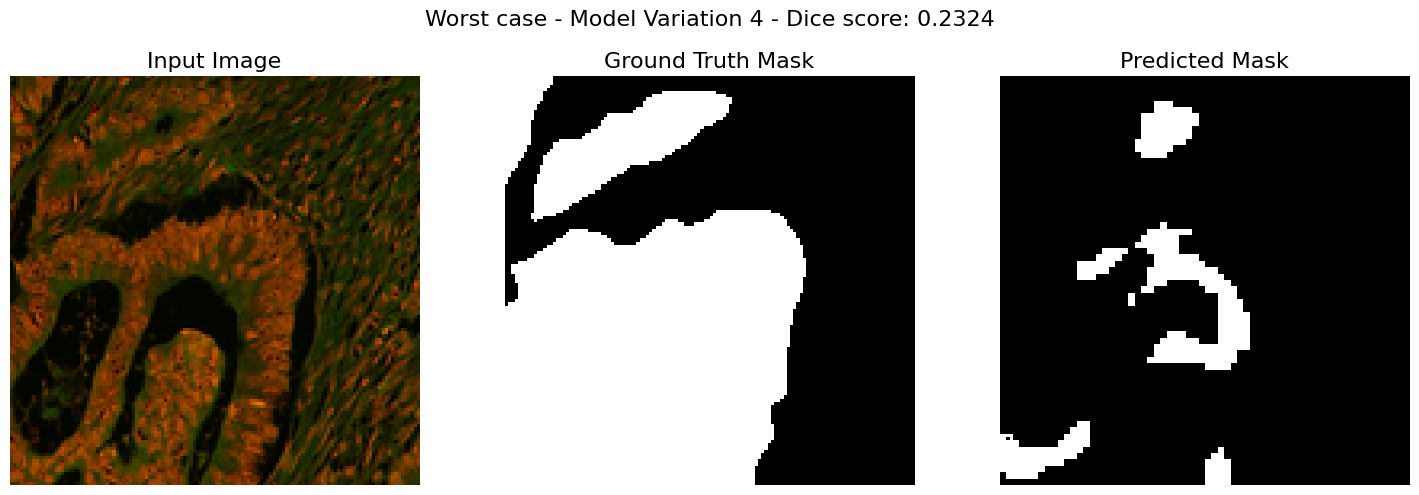

In [49]:
class SegmentationCNNVariation4(nn.Module):
    def __init__(self):
        super(SegmentationCNNVariation4, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, 1, 1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(p=0.3)  # Dropout layer

        self.conv2 = nn.Conv2d(8, 16, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(p=0.3)  # Dropout layer
        
        self.conv3 = nn.Conv2d(16, 32, 3, 1, 1)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.3)  # Dropout layer

        self.conv4 = nn.Conv2d(32, 64, 3, 1, 1)
        self.relu4 = nn.ReLU()
        self.conv5 = nn.Conv2d(64, 64, 3, 1, 1)
        self.relu5 = nn.ReLU()
        self.dropout4 = nn.Dropout(p=0.3)  # Dropout layer

        self.up1 = nn.ConvTranspose2d(64, 32, 2, 2)
        self.relu6 = nn.ReLU()
        
        self.conv6 = nn.Conv2d(32, 16, 3, 1, 1)
        self.relu7 = nn.ReLU()
        self.dropout5 = nn.Dropout(p=0.3)  # Dropout layer
        
        self.conv7 = nn.Conv2d(16, 1, 3, 1, 1)
        self.up2 = nn.ConvTranspose2d(1, 1, 2, 2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = self.dropout2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.dropout4(x)

        x = self.up1(x)
        x = self.relu6(x)

        x = self.conv6(x)
        x = self.relu7(x)
        x = self.dropout5(x)

        x = self.conv7(x)
        x = self.up2(x)
        return x.squeeze()

model_variation4 = SegmentationCNNVariation4().to(device)
optimizer = torch.optim.Adam(model_variation4.parameters(), lr=learning_rate)
train_segmentation_network(model_variation4, criterion, optimizer, num_epochs=num_epochs,train_loader=train_loader_augmented, test_loader=test_loader,  device=device, model_name='Segmentation CNN Variation 2')

best_case_variation_4, worst_case_variation_4 = find_best_and_worst_case(model_variation4, X_test, Y_test, device)

visualize_case(best_case_variation_4, device, name="Best case - Model Variation 4")
visualize_case(worst_case_variation_4, device, name="Worst case - Model Variation 4")